## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
df=pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

## Display First And Random 5 Rows¶


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
110,3,171,72,33,135,33.3,0.199,24,1
361,5,158,70,0,0,29.8,0.207,63,0
411,1,112,72,30,176,34.4,0.528,25,0
663,9,145,80,46,130,37.9,0.637,40,1
523,9,130,70,0,0,34.2,0.652,45,1


## make some statistical view


In [58]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.groupby('Outcome').std()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.017185,26.141200,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
1,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254


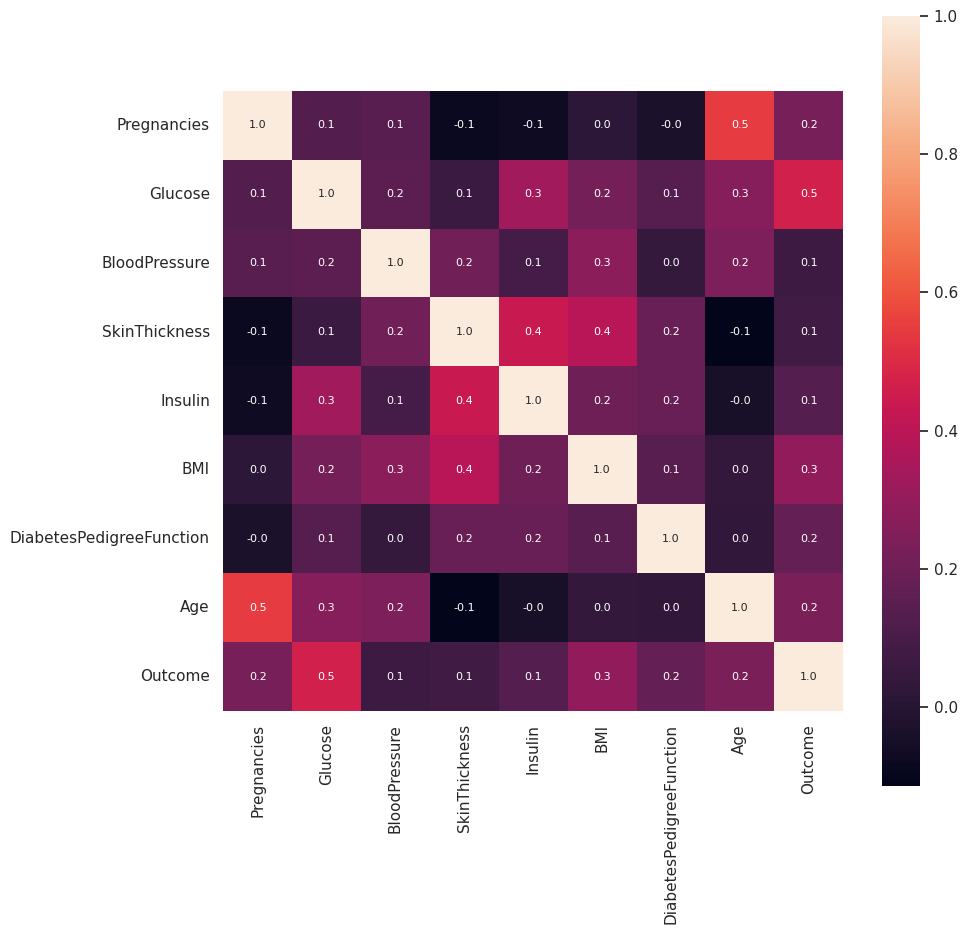

In [7]:
sns.set_theme()
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8})
plt.show()

/tmp/ipykernel_186/1599895865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


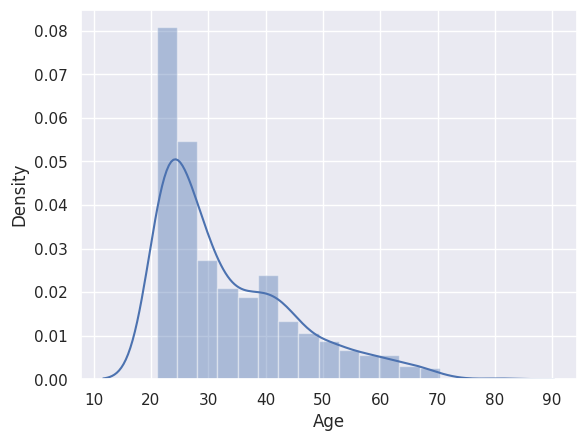

In [8]:
sns.distplot(df['Age'])
plt.show()

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


`some columns need to standerized and no null value in data`

## Finding The Count Of Different Labels

In [10]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

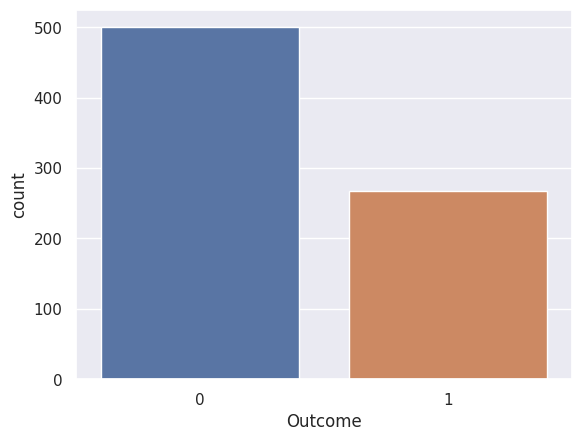

In [11]:
sns.countplot(x='Outcome',data=df)

## Display Number Of Rows And Columns

In [12]:
print(f"Data Frame shape       : {df.shape}")

Data Frame shape       : (768, 9)


## Show Null,Nan And Duplication Values In Data

In [13]:
print(f"The sum of null values is      : {df.isnull().sum().sum()}")


The sum of null values is      : 0


In [62]:
print(f"The sum of NAN values is      : {df.isna().sum().sum()}")


The sum of null values is      : 0


In [63]:
print(f"The sum of NAN values is      : {df.duplicated().sum().sum()}")


The sum of NAN values is      : 0


## Show Data Types Of Columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## spliting the data

In [15]:
X = df.drop(columns='Outcome',axis=1)
y = df['Outcome']

In [16]:
print(f"X shape       : {X.shape}")
print(f"Y shape       : {y.shape}")

X shape       : (768, 8)
Y shape       : (768,)


## Standerized Data

In [17]:
scaler = StandardScaler()
Standered_X=scaler.fit_transform(X)

In [18]:
df.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [19]:
print(f"X standerized       : {Standered_X.std()}")

X standerized       : 1.0


In [20]:
print(f"Y standerized       : {y.std()}")

Y standerized       : 0.4769513772427971


## Splitting The Data After Standerized

In [48]:
X_train,X_test,y_train,y_test=train_test_split(Standered_X,y,test_size=0.2,random_state=42,stratify=y)

In [49]:
print(f"X shape       : {X.shape}")
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")

X shape       : (768, 8)
X_train shape : (614, 8)
X_test shape  : (154, 8)


## Train The Model

In [50]:
model=svm.SVC(kernel='linear')

In [51]:
model.fit(X_train,y_train)

SVC(kernel='linear')

## Model Evaluation


In [52]:
Y_train_predict=model.predict(X_train)
train_accuracy=accuracy_score(Y_train_predict,y_train)

In [53]:
print(f"the accurcy score of train is  : {train_accuracy}")

the accurcy score of train is  : 0.7915309446254072


In [54]:
Y_test_predict=model.predict(X_test)
test_accuracy=accuracy_score(Y_test_predict,y_test)

In [55]:
print(f"the accurcy score of test is  : {test_accuracy}")

the accurcy score of test is  : 0.7207792207792207


## Make Prediction System¶


In [29]:
input_data=(6,148,72,35,0,33.6,0.627,50)

In [30]:
input_as_array=np.asarray(input_data)
input_reshaped=input_as_array.reshape(1,-1)

prediction =model.predict(input_reshaped)
if prediction == 0:
    prediction = "Non-Diabetes"
else :
    prediction = "Diabetes"

In [31]:
print(f"the Final Prediction Is  : {prediction}")


the Final Prediction Is  : Diabetes


# Thank You


# Made By : Ali Osama